In [1]:
%pylab inline
import hmf
from configparser import ConfigParser
import astropy.table as astTab

Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'hmf'

# run on Master@ipmu

In [2]:
parser =   ConfigParser()
configName='../config/config_lbd2.5_GAMA09H.ini'
parser.read(configName)
scale  =   parser.getfloat('transPlane','scale')
ny     =   parser.getint('transPlane'  ,'ny')
nx     =   parser.getint('transPlane'  ,'nx')
xMin   =   parser.getfloat('transPlane','xMin')
yMin   =   parser.getfloat('transPlane','yMin')
xMax   =   xMin+nx*scale
yMax   =   yMin+ny*scale
yMax2  =   np.pi/2.-yMin*np.pi/180.
yMin2  =   np.pi/2.-yMax*np.pi/180.
area   =   nx*np.pi/180.*scale*(np.cos(yMin2)-np.cos(yMax2))

NameError: name 'ConfigParser' is not defined

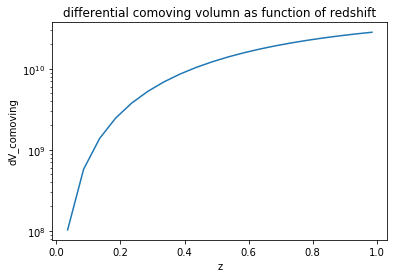

In [84]:
nlp    =   parser.getint('lensZ','nlp')
zlMin  =   parser.getfloat('lensZ','zlMin')
zlscale=   parser.getfloat('lensZ','zlscale')
zlBin  =   np.arange(zlMin,zlMin+zlscale*nlp,zlscale)+zlscale/2.
dcmV   =   hmfun.parameter_values['cosmo_model'].differential_comoving_volume(zlBin).value
plt.plot(zlBin,dcmV)
plt.title('differential comoving volumn as function of redshift')
plt.ylabel('dV_comoving')
plt.xlabel('z')
plt.yscale('log')

In [86]:
hmfun  =   hmf.MassFunction(Mmin=14.,Mmax=16)
mAll   =   []
zAll   =   []
conc   =   []
for i,iz in enumerate(zlBin):
    hmfun.update(z=iz)
    volumn=dcmV[i]*zlscale*area
    nhalo=int(hmfun.ngtm[0]*volumn+0.5)
    allNum+=nhalo
    zmin=iz-zlscale/2.
    zmax=iz+zlscale/2.
    zAll.extend(np.random.uniform(low=zmin,high=zmax,size=nhalo))
    mAll.extend(hmf.sample_mf(N=nhalo,log_mmin=13.5,z=iz,Mmax=16)[0])

In [91]:
zAll=np.array(zAll)
mAll=np.array(mAll)
concAll=6.02*(mAll/1.E13)**(-0.12)*(1.47/(1.+zAll[i]))**(0.16)
raAll=np.random.uniform(low=xMin,high=xMax,size=len(zAll))
decAll=np.random.uniform(low=yMin,high=yMax,size=len(zAll))
cols=(zAll,mAll,concAll,raAll,decAll)
names=('z_cl','M_200','conc','ra','dec')
haloTab=astTab.Table(cols,names=names)
haloTab.write('haloCat.csv')

# For demonstration
halo mass function

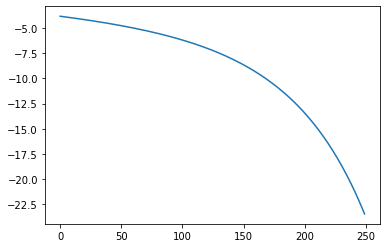

In [28]:
plt.plot(np.log10(hmfun.dndlog10m))